In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
#Image whitening
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  #Load data
X = X_train[:1000]                                          #Select images
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3]) #Flaten the data

In [4]:
#Plots the image X
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

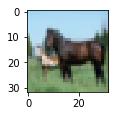

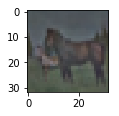

In [13]:
#Image whitening cont.
X_norm = X / 255.
cov = np.cov(X_norm, rowvar=True)
U,S,V = np.linalg.svd(cov)

epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

plotImage(X[12, :])
plotImage(X_ZCA_rescaled[12, :])

In [6]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [7]:
print(Xtr.shape)
print(28*28)

(60000, 28, 28)
784


In [8]:
#Plots the sample in Xtr at index i
def plotSample(i):
    Image = Xtr[i,:,:]
    Label = Ltr[i]
    plt.title('Label is {Label}'.format(Label=Label))
    plt.imshow(Image)
    plt.show()
    plt.close()

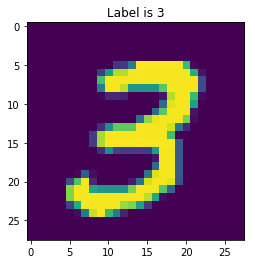

Min:  0 
Max:  255 
Mean:  45.74872448979592 
StdDev:  90.0166048934103


In [9]:
#Sample min, max, mean and standard deviation
index = 7
img = Xtr[index,:,:]
plotSample(index)
print("Min: ", np.min(img), "\nMax: ", np.max(img), 
      "\nMean: ", np.mean(img), "\nStdDev: ", np.std(img))

In [10]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])
Tr_set.shape

(500, 784)

In [11]:
def predict(X, L, k):
    num_test = X.shape[0]
    Lpred = np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        if(L == 1):
            distances = np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        elif(L == 2):
            distances = np.sqrt(np.sum(np.square(np.abs(Tr_set-X[i,:])),axis=1))
        else:
            print("L needs to be set to 1 or 2")
            
        top_k = np.zeros(k, dtype=Ltr_set.dtype)
        for j in range (0, k):
            min_index = np.argmin(distances)
            top_k[j] = Ltr_set[min_index]
            np.put(distances, min_index, np.inf)
        #print(top_k)
        #print(np.bincount(top_k))
        #print(np.bincount(top_k).argmax())
        Lpred[i] = np.bincount(top_k).argmax()
    return Lpred

In [12]:
Test_images = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
Labels_predicted = predict(Test_images, 2, 3)

print("Accuracy:", np.mean(Labels_predicted == L_test))



Accuracy: 0.1628
